# **Data Mining Project** 
# Task 1: Data Understanding and Data Preparation
Pistolesi Veronica, Poli Francesca

### Libraries

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from collections import defaultdict
from scipy.stats import pearsonr
from statistics import mode

### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweets = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/tweets.csv', sep=',') 

# **TWEETS** 
# Task 1.1: Data Understanding 

## Data Quality (types, missing values, syntactic accuracy) and Distribution

The first step is looking at our data to check the structure of the tables and the datatypes we're working with, then we search for eventual null values.

In [ ]:
display(tweets)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
1,583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
2,461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
3,528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
4,575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!
...,...,...,...,...,...,...,...,...,...,...
13664691,588535254207467520,587491046,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors Congrats, maybe I'll be able to get ..."
13664692,580420653666402304,1414080518,0,0,1,0,0,1,2020-03-25 17:27:22,@DaddieEzme fr??
13664693,718157017970961,91781300,0,NaN,l25suv5,NaN,0.0,NaN,2016-07-10 22:43:09,NaN
13664694,441301348676415488,127895572,0,0,1,1,0,0,2019-03-07 19:56:55,Shooting crew of porn movies. #TheWorstJobToHave


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.describe(include="all", datetime_is_numeric=True)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
count,13664694,13447413,13227562,13016818,13017154,12607172,13016073,12810531,13664696,13126975
unique,11672135,222285,229167,158619,158763,104779,157145,131538,8127084,6778478
top,dmy,497404180,0,0,0,0,0,0,2020-04-04 03:43:02,"Ci sedemmo dalla parte del torto, visto che tu..."
freq,14,4600,9419784,11790440,9467209,10470209,9894198,7561627,133,6932


In [ ]:
tweets.isnull().any()

id                 True
user_id            True
retweet_count      True
reply_count        True
favorite_count     True
num_hashtags       True
num_urls           True
num_mentions       True
created_at        False
text               True
dtype: bool

In [ ]:
tweets = tweets.drop_duplicates()

In [ ]:
tweets.shape

(11712597, 10)

### **'id'** attribute

We check for the uniqueness of the IDs.

In [ ]:
tweets['id'] = range(1, 1+len(tweets)) # id value has to be unique

In [ ]:
tweets

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,1,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
1,2,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
2,3,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
3,4,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
4,5,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!
...,...,...,...,...,...,...,...,...,...,...
13664690,11712593,220933018,0,0,0,0,0,0,2018-05-04 05:29:33,ESTA MANANA AUN ESTA MUY FRIO ! MIREN ESTO ! ...
13664691,11712594,587491046,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors Congrats, maybe I'll be able to get ..."
13664693,11712595,91781300,0,NaN,l25suv5,NaN,0.0,NaN,2016-07-10 22:43:09,NaN
13664694,11712596,127895572,0,0,1,1,0,0,2019-03-07 19:56:55,Shooting crew of porn movies. #TheWorstJobToHave


### **'user_id '** attribute

We now validate the data in the attribute *user_id*, considering that non-numerical values are not acceptable.

In [ ]:
print("Number of user ids with NaN value:", tweets['user_id'].isnull().sum())

Number of user ids with NaN value: 217283


In [ ]:
tweets.user_id.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
print("Number of ids with NaN value:", tweets['user_id'].isnull().sum()) # convertendo anche gli inf in NaN
# No inf found

Number of ids with NaN value: 217283


*to_numeric* is a Pandas built-in function that transforms non-numerical values in NaN and converts the numericals into *float64* datatype.

In [ ]:
tweets['user_id'] = pd.to_numeric(tweets.user_id, errors='coerce')

In [ ]:
tweets = tweets[tweets['user_id'].notna()] # rows with NaN value in user_id column are discarded

In [ ]:
print("Number of user ids with NaN value:", tweets['user_id'].isnull().sum()) 

Number of user ids with NaN value: 0


In [ ]:
tweets['user_id']= tweets['user_id'].astype('int')

<ipython-input-18-329ef4aee4f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['user_id']= tweets['user_id'].astype('int')


In [ ]:
len(tweets['user_id'].unique())

12226

In [ ]:
#tweets['user_id']=tweets['user_id'].astype(str)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.user_id.describe() #include="all", 

count               11278702.00
mean         -14719007160919.12
std        11651882355340410.00
min     -9223372036854775808.00
25%                232804792.00
50%                468080275.00
75%               1232534634.00
max           20000000000000.00
Name: user_id, dtype: float64

In [ ]:
tweets.user_id.dtype

dtype('int64')

### **'retweet_count'** attribute

In [ ]:
print("Number of retweets count with NaN value:", tweets['retweet_count'].isnull().sum())

Number of retweets count with NaN value: 355720


Transformation of non-numerical values in NaN and converts the numericals into *float64* datatype.

In [ ]:
tweets['retweet_count'] = pd.to_numeric(tweets.retweet_count, errors='coerce')

<ipython-input-24-39a78bf27270>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['retweet_count'] = pd.to_numeric(tweets.retweet_count, errors='coerce')


In [ ]:
print("Number of retweet counts with NaN value:", tweets['retweet_count'].isnull().sum()) 

Number of retweet counts with NaN value: 518684


In [ ]:
tweets.retweet_count.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of retweet counts with NaN value:", tweets['retweet_count'].isnull().sum()) 
# 1 inf found

Number of retweet counts with NaN value: 518685


Checking for negative and decimal values through the numericals.

In [ ]:
(tweets.retweet_count < 0).sum() # There are no negative numbers in retweet_count

0

In [ ]:
(tweets.retweet_count %1 != 0).sum() # There are no decimal numbers (= NaN)

518685

In [ ]:
np.min(tweets.retweet_count)

0.0

In [ ]:
np.max(tweets.retweet_count)

2e+134

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.retweet_count.describe()

count                                          10760017.00
mean    18587331228194155713146320962013148737847345398...
std     60971027920142863145838137012700988456865038078...
min                                                   0.00
25%                                                   0.00
50%                                                   0.00
75%                                                   1.00
max     19999999999999998429640729934139863001509965474...
Name: retweet_count, dtype: float64

* Statistics (with outliers)

In [ ]:
print('Retweet count Mean:', round(np.mean(tweets.retweet_count),2), 'retweets count')

Retweet count Mean: 1.8587331228194156e+127 retweets count


In [ ]:
print('Retweets count Standard Deviation:',round(np.std(tweets.retweet_count),2), 'retweets count')

Retweets count Standard Deviation: 6.097102508692107e+130 retweets count


In [ ]:
median= np.nanmedian(tweets.retweet_count)
print('Retweet count Median:', round(median,2), 'retweets count')

Retweet count Median: 0.0 retweets count


In [ ]:
print('Retweet count MAD:', round(stats.median_abs_deviation(tweets.retweet_count, nan_policy='omit'),2), 'retweets count')

Retweet count MAD: 0.0 retweets count


In [ ]:
stats.mode(tweets.retweet_count, nan_policy='omit') 

ModeResult(mode=array([0.]), count=array([7771990.]))

In [ ]:
mode= stats.mode(tweets.retweet_count, nan_policy='omit')[0][0]
print("Retweets count Mode:", mode)

Retweets count Mode: 0.0


* Boxplot and outliers' analysis

In [ ]:
# Check the number of outliers
Q1, Q3= tweets.retweet_count.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in tweets.retweet_count:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/tweets.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1726632
Percentage of outliers 15.31 %


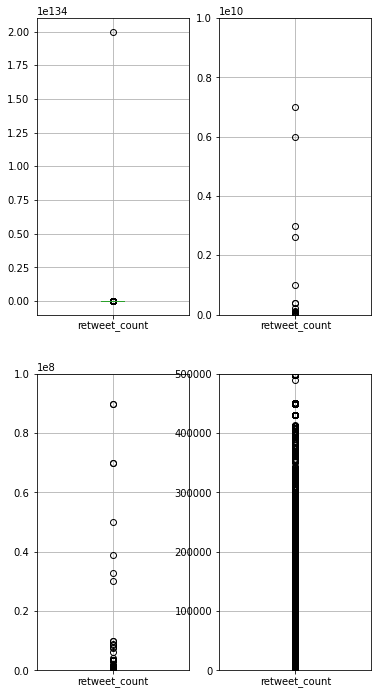

In [ ]:
fig = plt.figure()
fig.set_figheight(12)

plt.subplot(2, 2, 1)
box1 = tweets.boxplot(column=['retweet_count'])

plt.subplot(2, 2, 2)
box2 = tweets.boxplot(column=['retweet_count'])
plt.ylim(0, 1e10)

plt.subplot(2, 2, 3)
box3 = tweets.boxplot(column=['retweet_count'])
plt.ylim(0, 1e8)

plt.subplot(2, 2, 4)
box4 = tweets.boxplot(column=['retweet_count'])
plt.ylim(0, 0.5e6)  # possibile threshold: 0.4e6

plt.show()

In [ ]:
threshold= 0.5e6

In [ ]:
outliers= tweets[tweets.retweet_count>threshold].retweet_count.count() # how many outliers> threshold?
percentage = round((outliers*100)/tweets.shape[0],4)
print('Number of outliers> threshold:', outliers)
print('Percentage of outliers> threshold:', percentage,'%')

Number of outliers> threshold: 507
Percentage of outliers> threshold: 0.0045 %


* Outliers management > substitution with threshold

In [ ]:
tweets['retweet_count']=tweets['retweet_count'].apply(lambda x: threshold if x >threshold else x)

<ipython-input-43-ce8b4e16cfad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['retweet_count']=tweets['retweet_count'].apply(lambda x: threshold if x >threshold else x)


* Statistics without outliers (substituted with threshold) 

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.retweet_count.describe() 

count   10760017.00
mean         537.82
std         8161.74
min            0.00
25%            0.00
50%            0.00
75%            1.00
max       500000.00
Name: retweet_count, dtype: float64

In [ ]:
print('Mean:', round(np.mean(tweets.retweet_count),2))
print('St Dev:',round(np.std(tweets.retweet_count),2))
median= np.nanmedian(tweets.retweet_count)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(tweets.retweet_count, nan_policy='omit'),2))
mode= stats.mode(tweets.retweet_count, nan_policy='omit')[0][0]
print("Mode:", mode)

Mean: 537.82
St Dev: 8161.74
Median: 0.0
MAD: 0.0
Mode: 0.0


* Substitution of NaN values with most appropriate index

In [ ]:
tweets.retweet_count.fillna(value=median, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of retweets count with NaN value:", tweets['retweet_count'].isnull().sum())

Number of retweets count with NaN value: 0


* Final boxplot 

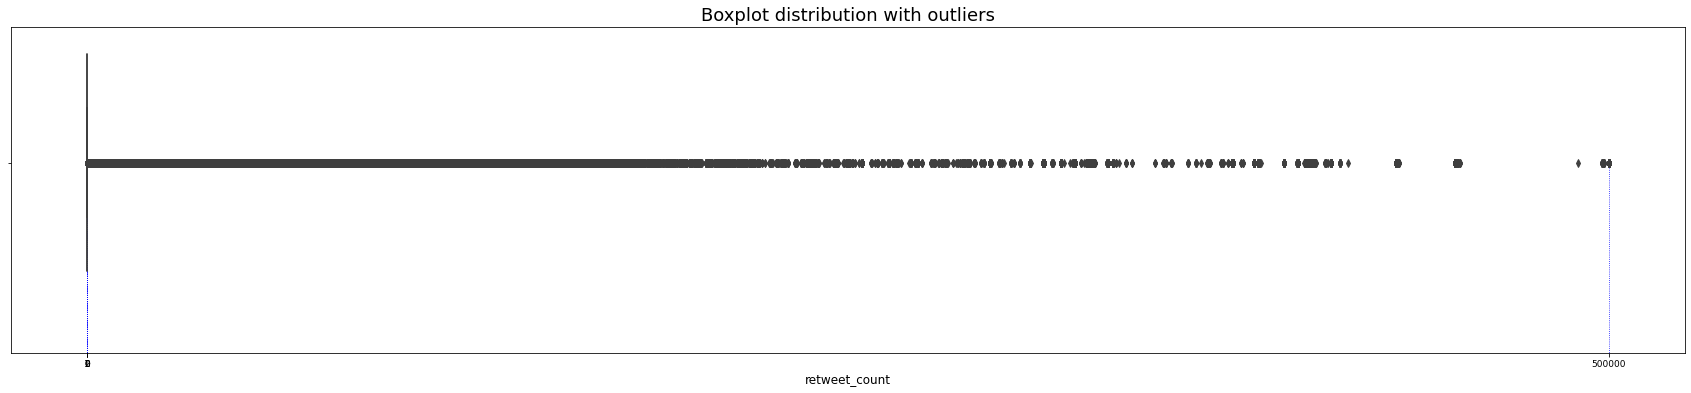

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='retweet_count', data=tweets)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(tweets.retweet_count, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("retweet_count", rotation = "horizontal", size = 12)
plt.show()

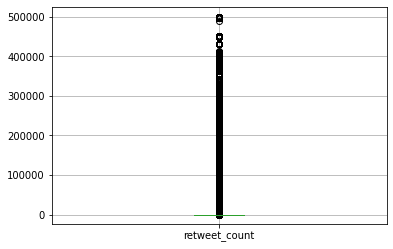

In [ ]:
tweets.boxplot(column=['retweet_count']) 

### **'reply_count'** attribute

In [ ]:
print("Number of replies count with NaN value:", tweets['reply_count'].isnull().sum())

Number of replies count with NaN value: 514586


Transformation of non-numerical values in NaN and converts the numericals into *float64* datatype.

In [ ]:
tweets['reply_count'] = pd.to_numeric(tweets.reply_count, errors='coerce')

<ipython-input-51-46945dbd6735>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['reply_count'] = pd.to_numeric(tweets.reply_count, errors='coerce')


In [ ]:
print("Number of reply_count with NaN value:", tweets['reply_count'].isnull().sum()) 

Number of reply_count with NaN value: 654509


In [ ]:
tweets.reply_count.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of reply_count with NaN value:", tweets['reply_count'].isnull().sum()) 
# 1 inf found

Number of reply_count with NaN value: 654510


Checking for negative and decimal values through the numericals.

In [ ]:
(tweets.reply_count < 0).sum() # There are no negative numbers in reply_count

0

In [ ]:
(tweets.reply_count %1 != 0).sum() # There are no decimal numbers (= NaN)

654510

In [ ]:
np.min(tweets.reply_count)

0.0

In [ ]:
np.max(tweets.reply_count)

2e+110

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.reply_count.describe()  

count                                          10624192.00
mean    18824960994681668061985263570167916872849495834...
std     61359532258127254450474990892376884105421308150...
min                                                   0.00
25%                                                   0.00
50%                                                   0.00
75%                                                   0.00
max     20000000000000000471387350283405116664990655901...
Name: reply_count, dtype: float64

In [ ]:
print('reply_count Mean:', round(np.mean(tweets.reply_count),2), 'reply_count')

reply_count Mean: 1.882496099468167e+103 reply_count


In [ ]:
print('reply_count Standard Deviation:',round(np.std(tweets.reply_count),2), 'reply_count')

reply_count Standard Deviation: 6.1359529370400194e+106 reply_count


In [ ]:
median= np.nanmedian(tweets.reply_count)
print('reply_count Median:', round(median,2), 'reply_count')

reply_count Median: 0.0 reply_count


In [ ]:
stats.median_abs_deviation(tweets.reply_count, nan_policy='omit')

0.0

In [ ]:
stats.mode(tweets.reply_count, nan_policy='omit')  

ModeResult(mode=array([0.]), count=array([10605786.]))

In [ ]:
mode= stats.mode(tweets.reply_count, nan_policy='omit')[0][0]
print("reply_count Mode:", mode)

reply_count Mode: 0.0


* Boxplot and outliers' analysis

In [ ]:
# Check the number of outliers
Q1, Q3= tweets.reply_count.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in tweets.reply_count:
  if x > max or x < min: 
    outliers = outliers+1
    
percentage = round((outliers*100)/tweets.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 18406
Percentage of outliers 0.16 %


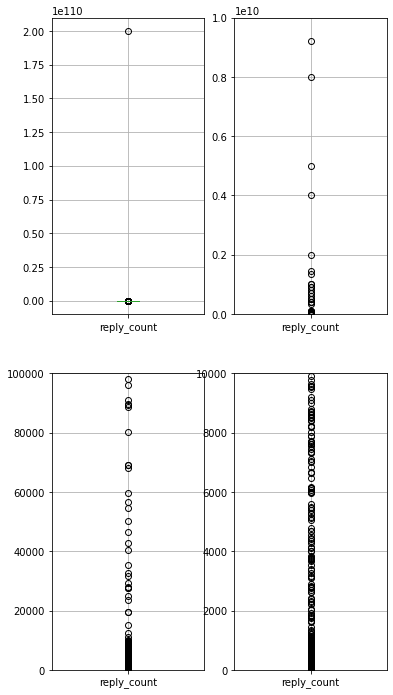

In [ ]:
fig = plt.figure()
fig.set_figheight(12)

plt.subplot(2, 2, 1)
box1 = tweets.boxplot(column=['reply_count'])

plt.subplot(2, 2, 2)
box2 = tweets.boxplot(column=['reply_count'])
plt.ylim(0, 1e10)

plt.subplot(2, 2, 3)
box3 = tweets.boxplot(column=['reply_count'])
plt.ylim(0, 1e5)

plt.subplot(2, 2, 4)
box4 = tweets.boxplot(column=['reply_count'])
plt.ylim(0, 1e4)  

plt.show()

In [ ]:
threshold=1e4

In [ ]:
outliers= tweets[tweets.reply_count>threshold].reply_count.count() # how many outliers> threshold?
percentage = round((outliers*100)/tweets.shape[0], 4) 
print('Number of outliers> threshold:', outliers)
print('Percentage of outliers> threshold:', percentage,'%')

Number of outliers> threshold: 99
Percentage of outliers> threshold: 0.0009 %


* Outliers management > substitution with threshold

In [ ]:
tweets['reply_count']=tweets['reply_count'].apply(lambda x: threshold if x >threshold else x)

<ipython-input-70-3fb30e90bbde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['reply_count']=tweets['reply_count'].apply(lambda x: threshold if x >threshold else x)


* Statistics without outliers (substituted with threshold) 

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.reply_count.describe() 

count   10624192.00
mean           0.18
std           36.63
min            0.00
25%            0.00
50%            0.00
75%            0.00
max        10000.00
Name: reply_count, dtype: float64

In [ ]:
print('Mean:', round(np.mean(tweets.reply_count),2))
print('St Dev:',round(np.std(tweets.reply_count),2))
median= np.nanmedian(tweets.reply_count)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(tweets.reply_count, nan_policy='omit'),2))
mode= stats.mode(tweets.reply_count, nan_policy='omit')[0][0]
print("Mode:", mode)

Mean: 0.18
St Dev: 36.63
Median: 0.0
MAD: 0.0
Mode: 0.0


* Sobstitution of NaN values with the most appropriate index

In [ ]:
tweets.reply_count.fillna(value=median, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of reply_count with NaN value:", tweets['reply_count'].isnull().sum())

Number of reply_count with NaN value: 0


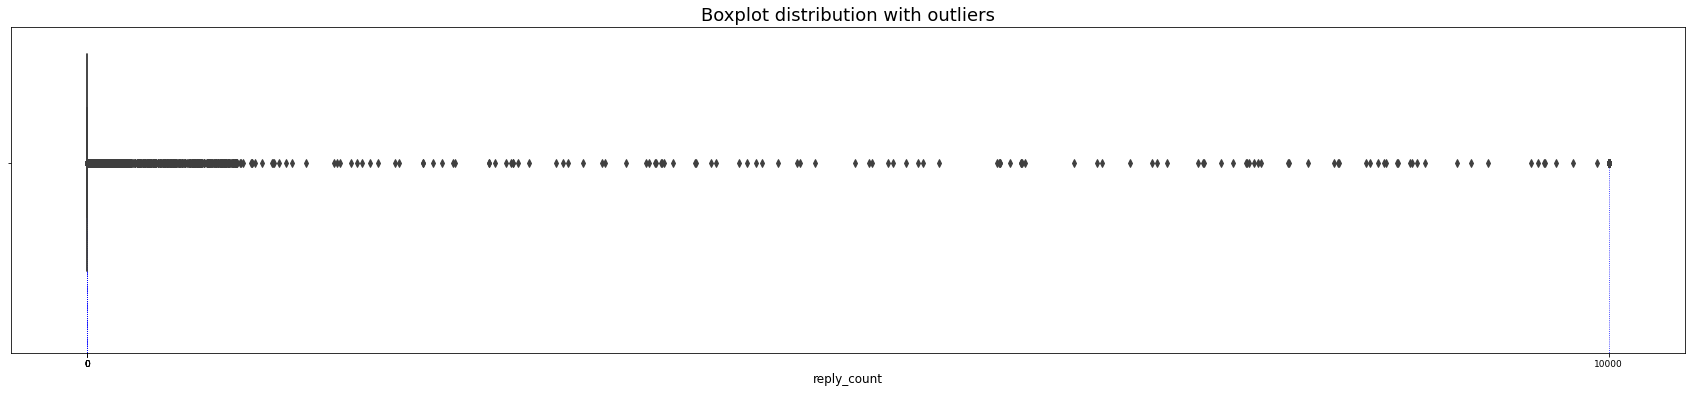

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='reply_count', data=tweets)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(tweets.reply_count, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("reply_count", rotation = "horizontal", size = 12)
plt.show()

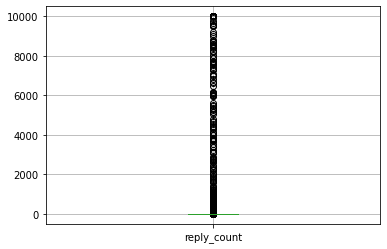

In [ ]:
tweets.boxplot(column=['reply_count']) 

### **'favorite_count'** attribute

In [ ]:
print("Number of favorite_count with NaN value:", tweets['favorite_count'].isnull().sum())

Number of favorite_count with NaN value: 514651


In [ ]:
tweets['favorite_count'] = pd.to_numeric(tweets.favorite_count, errors='coerce')

<ipython-input-78-112403e65166>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['favorite_count'] = pd.to_numeric(tweets.favorite_count, errors='coerce')


In [ ]:
print("Number of favorite_count with NaN value:", tweets['favorite_count'].isnull().sum()) 

Number of favorite_count with NaN value: 653433


In [ ]:
tweets.favorite_count.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of favorite_count with NaN value:", tweets['favorite_count'].isnull().sum()) 
# No inf found

Number of favorite_count with NaN value: 653433


Checking for negative and decimal values through the numericals.

In [ ]:
(tweets.favorite_count < 0).sum() # There is a negative number in favorite_count

1

In [ ]:
(tweets.favorite_count %1 != 0).sum() # There are no decimal numbers (= NaN)

653433

In [ ]:
np.min(tweets.favorite_count)

-1.0

In [ ]:
tweets.loc[tweets['favorite_count']<0, 'favorite_count'] = np.nan

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
np.min(tweets.favorite_count)

0.0

In [ ]:
np.max(tweets.favorite_count)

7e+211

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.favorite_count.describe() 

count                                          10625268.00
mean    65880691197624379982538555852063447700926809813...
std                                                    inf
min                                                   0.00
25%                                                   0.00
50%                                                   0.00
75%                                                   0.00
max     69999999999999999277907762271429800117431512202...
Name: favorite_count, dtype: float64

In [ ]:
print('favorite_count Mean:', round(np.mean(tweets.favorite_count),2), 'favorite_count')

favorite_count Mean: 6.588069119762438e+204 favorite_count


In [ ]:
print('favorite_count Standard Deviation:',round(np.std(tweets.favorite_count),2), 'favorite_count')

favorite_count Standard Deviation: inf favorite_count


In [ ]:
median= np.nanmedian(tweets.favorite_count)
print('favorite_count Median:', round(median,2), 'favorite_count')

favorite_count Median: 0.0 favorite_count


In [ ]:
stats.median_abs_deviation(tweets.favorite_count, nan_policy='omit')

0.0

In [ ]:
stats.mode(tweets.favorite_count, nan_policy='omit')

ModeResult(mode=array([0.]), count=array([8516943.]))

In [ ]:
mode= stats.mode(tweets.favorite_count, nan_policy='omit')[0][0]
print("favorite_count Mode:", mode)

favorite_count Mode: 0.0


* Boxplot and outliers' analysis

In [ ]:
# Check the number of outliers
Q1, Q3= tweets.favorite_count.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in tweets.favorite_count:
  if x > max or x < min: 
    outliers = outliers+1
    
percentage = round((outliers*100)/tweets.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 2108325
Percentage of outliers 18.69 %


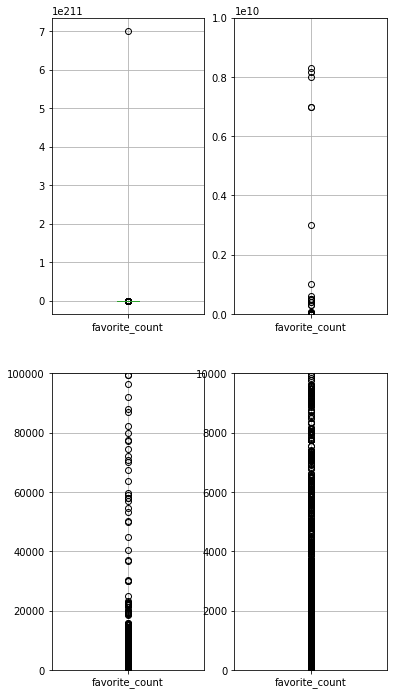

In [ ]:
fig = plt.figure(dpi=500)
fig.set_figheight(12)

plt.subplot(2, 2, 1)
box1 = tweets.boxplot(column=['favorite_count'])

plt.subplot(2, 2, 2)
box2 = tweets.boxplot(column=['favorite_count'])
plt.ylim(0, 1e10)

plt.subplot(2, 2, 3)
box3 = tweets.boxplot(column=['favorite_count'])
plt.ylim(0, 1e5)

plt.subplot(2, 2, 4)
box4 = tweets.boxplot(column=['favorite_count'])
plt.ylim(0, 1e4)  

plt.show()

In [ ]:
threshold=1e4

In [ ]:
outliers= tweets[tweets.favorite_count>threshold].favorite_count.count() # how many outliers> threshold?
percentage = round((outliers*100)/tweets.shape[0], 4) 
print('Number of outliers> threshold:', outliers)
print('Percentage of outliers> threshold:', percentage,'%')

Number of outliers> threshold: 243
Percentage of outliers> threshold: 0.0022 %


* Outliers management > substitution with threshold

In [ ]:
tweets['favorite_count']=tweets['favorite_count'].apply(lambda x: threshold if x >threshold else x)

<ipython-input-99-5be93b7cc78f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['favorite_count']=tweets['favorite_count'].apply(lambda x: threshold if x >threshold else x)


* Statistics without outliers (substituted with threshold) 

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.favorite_count.describe() 

count   10625268.00
mean           1.38
std           71.59
min            0.00
25%            0.00
50%            0.00
75%            0.00
max        10000.00
Name: favorite_count, dtype: float64

In [ ]:
print('Mean:', round(np.mean(tweets.favorite_count),2))
print('St Dev:',round(np.std(tweets.favorite_count),2))
median= np.nanmedian(tweets.favorite_count)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(tweets.favorite_count, nan_policy='omit'),2))
mode= stats.mode(tweets.favorite_count, nan_policy='omit')[0][0]
print("Mode:", mode)

Mean: 1.38
St Dev: 71.59
Median: 0.0
MAD: 0.0
Mode: 0.0


* Sobstitution of NaN values with the most appropriate index

In [ ]:
tweets.favorite_count.fillna(value=median, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of favorite_count with NaN value:", tweets['favorite_count'].isnull().sum())

Number of favorite_count with NaN value: 0


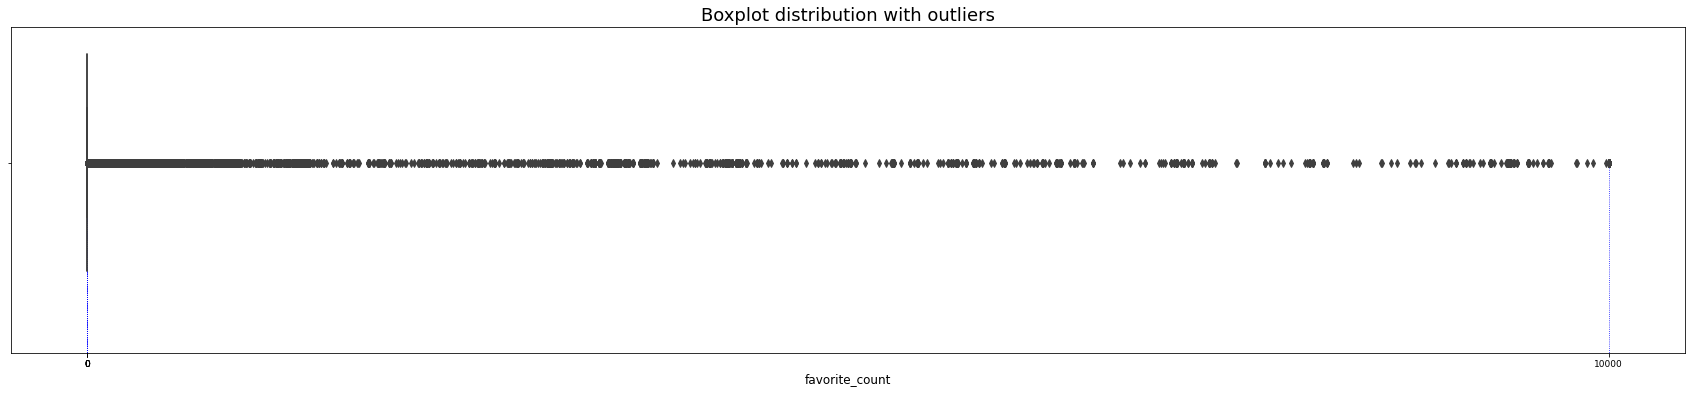

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='favorite_count', data=tweets)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(tweets.favorite_count, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("favorite_count", rotation = "horizontal", size = 12)
plt.show()

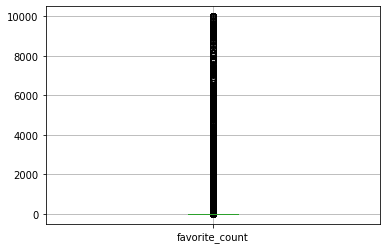

In [ ]:
tweets.boxplot(column=['favorite_count']) 

### **'num_hashtags'** attribute

In [ ]:
print("Number of num_hashtags with NaN value:", tweets['num_hashtags'].isnull().sum())

Number of num_hashtags with NaN value: 823026


In [ ]:
tweets['num_hashtags'] = pd.to_numeric(tweets.num_hashtags, errors='coerce')

<ipython-input-107-c1641d2f5510>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['num_hashtags'] = pd.to_numeric(tweets.num_hashtags, errors='coerce')


In [ ]:
print("Number of num_hashtags with NaN value:", tweets['num_hashtags'].isnull().sum()) 

Number of num_hashtags with NaN value: 914749


In [ ]:
tweets.num_hashtags.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of num_hashtags with NaN value:", tweets['num_hashtags'].isnull().sum()) 
# No inf found

Number of num_hashtags with NaN value: 914749


Checking for negative and decimal values through the numericals.

In [ ]:
(tweets.num_hashtags < 0).sum() # There is no negative number in num_hashtags

0

In [ ]:
(tweets.num_hashtags %1 != 0).sum() # There are no decimal numbers (= NaN)

914749

In [ ]:
np.min(tweets.num_hashtags)

0.0

In [ ]:
np.max(tweets.num_hashtags)

7e+153

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.num_hashtags.describe()  

count                                          10363953.00
mean    67541796069511309296197198198264970352893623084...
std     21743793884384086542522121154466687464613690642...
min                                                   0.00
25%                                                   0.00
50%                                                   0.00
75%                                                   0.00
max     69999999999999998120631076091867122333618783144...
Name: num_hashtags, dtype: float64

In [ ]:
print('num_hashtags Mean:', round(np.mean(tweets.num_hashtags),2), 'num_hashtags')

num_hashtags Mean: 6.754179606951131e+146 num_hashtags


In [ ]:
print('num_hashtags Standard Deviation:',round(np.std(tweets.num_hashtags),2), 'num_hashtags')

num_hashtags Standard Deviation: 2.174379283537343e+150 num_hashtags


In [ ]:
median= np.nanmedian(tweets.num_hashtags)
print('num_hashtags Median:', round(median,2), 'num_hashtags')

num_hashtags Median: 0.0 num_hashtags


In [ ]:
stats.median_abs_deviation(tweets.num_hashtags, nan_policy='omit')

0.0

In [ ]:
stats.mode(tweets.num_hashtags, nan_policy='omit') 

ModeResult(mode=array([0.]), count=array([9188329.]))

In [ ]:
mode= stats.mode(tweets.num_hashtags, nan_policy='omit')[0][0]
print("num_hashtags Mode:", mode)

num_hashtags Mode: 0.0


* Boxplot and outliers' analysis

In [ ]:
# Check the number of outliers
Q1, Q3= tweets.num_hashtags.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in tweets.num_hashtags:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/tweets.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1175624
Percentage of outliers 10.42 %


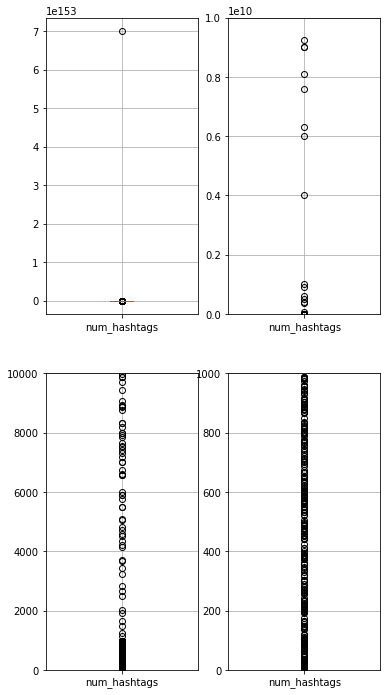

In [ ]:
fig = plt.figure()
fig.set_figheight(12)

plt.subplot(2, 2, 1)
box1 = tweets.boxplot(column=['num_hashtags'])

plt.subplot(2, 2, 2)
box2 = tweets.boxplot(column=['num_hashtags'])
plt.ylim(0, 1e10)

plt.subplot(2, 2, 3)
box3 = tweets.boxplot(column=['num_hashtags'])
plt.ylim(0, 1e4)

plt.subplot(2, 2, 4)
box4 = tweets.boxplot(column=['num_hashtags'])
plt.ylim(0, 1e3)  

plt.show()

In [ ]:
threshold=1e3

In [ ]:
outliers= tweets[tweets.num_hashtags>threshold].num_hashtags.count() # how many outliers> threshold?
percentage = round((outliers*100)/tweets.shape[0], 4) 
print('Number of outliers> threshold:', outliers)
print('Percentage of outliers> threshold:', percentage,'%')

Number of outliers> threshold: 111
Percentage of outliers> threshold: 0.001 %


* Outliers management > substitution with threshold

In [ ]:
tweets['num_hashtags']=tweets['num_hashtags'].apply(lambda x: threshold if x >threshold else x)

<ipython-input-126-02a3a0b9cadf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['num_hashtags']=tweets['num_hashtags'].apply(lambda x: threshold if x >threshold else x)


* Statistics without outliers (substituted with threshold) 

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.num_hashtags.describe() 

count   10363953.00
mean           0.20
std            4.32
min            0.00
25%            0.00
50%            0.00
75%            0.00
max         1000.00
Name: num_hashtags, dtype: float64

In [ ]:
print('Mean:', round(np.mean(tweets.num_hashtags),2))
print('St Dev:',round(np.std(tweets.num_hashtags),2))
median= np.nanmedian(tweets.num_hashtags)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(tweets.num_hashtags, nan_policy='omit'),2))
mode= stats.mode(tweets.num_hashtags, nan_policy='omit')[0][0]
print("Mode:", mode)

Mean: 0.2
St Dev: 4.32
Median: 0.0
MAD: 0.0
Mode: 0.0


* Sobstitution of NaN values with the most appropriate index

In [ ]:
tweets.num_hashtags.fillna(value=median, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of num_hashtags with NaN value:", tweets['num_hashtags'].isnull().sum())

Number of num_hashtags with NaN value: 0


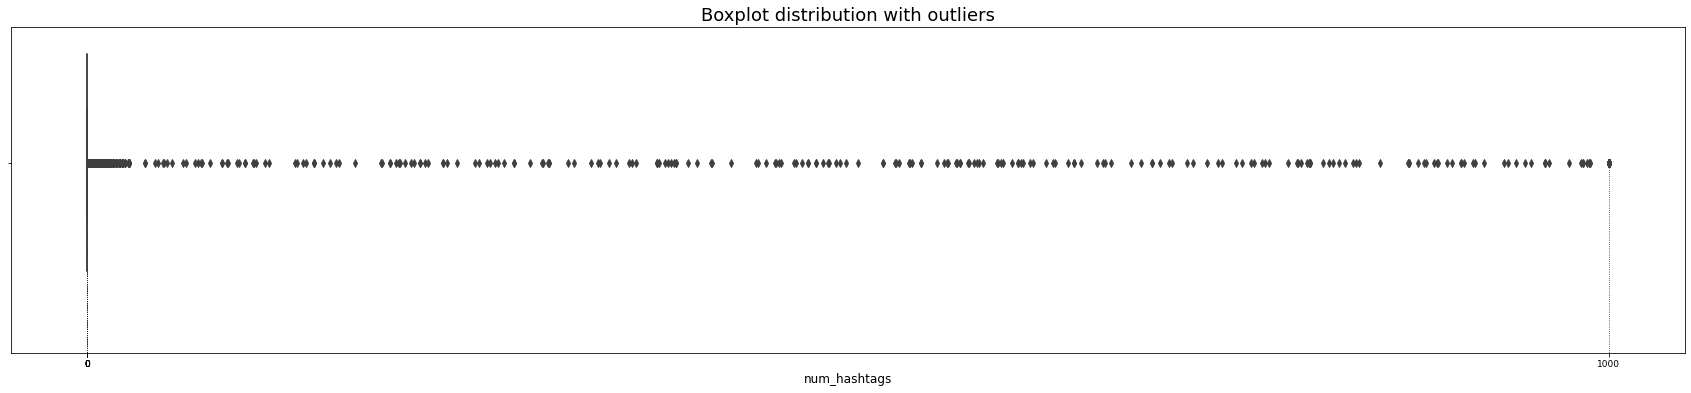

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='num_hashtags', data=tweets)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(tweets.num_hashtags, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("num_hashtags", rotation = "horizontal", size = 12)
plt.show()

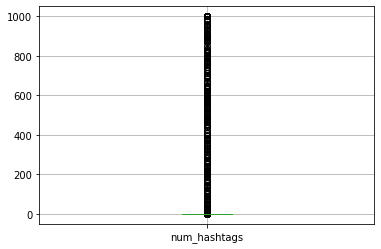

In [ ]:
tweets.boxplot(column=['num_hashtags']) 

### **'num_urls'** attribute

In [ ]:
print("Number of num_urls with NaN value:", tweets['num_urls'].isnull().sum())

Number of num_urls with NaN value: 515481


Transformation of non-numerical values in NaN and converts the numericals into *float64* datatype.

In [ ]:
tweets['num_urls'] = pd.to_numeric(tweets.num_urls, errors='coerce')

<ipython-input-134-9e37a5a5f6ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['num_urls'] = pd.to_numeric(tweets.num_urls, errors='coerce')


In [ ]:
print("Number of num_urls with NaN value:", tweets['num_urls'].isnull().sum()) 

Number of num_urls with NaN value: 654272


In [ ]:
tweets.num_urls.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of num_urls with NaN value:", tweets['num_urls'].isnull().sum()) 
# No inf found

Number of num_urls with NaN value: 654272


Checking for negative and decimal values through the numericals.

In [ ]:
(tweets.num_urls < 0).sum() # There are no negative numbers in num_urls

0

In [ ]:
(tweets.num_urls %1 != 0).sum() # There are no decimal numbers (= NaN)

654272

In [ ]:
np.min(tweets.num_urls)

0.0

In [ ]:
np.max(tweets.num_urls)

1e+210

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.num_urls.describe() 

count                                          10624430.00
mean    94122696464657390721650950818918223579736995836...
std                                                    inf
min                                                   0.00
25%                                                   0.00
50%                                                   0.00
75%                                                   0.00
max     99999999999999992711378241934460557459866815329...
Name: num_urls, dtype: float64

In [ ]:
print('num_urls Mean:', round(np.mean(tweets.num_urls),2), 'num_urls')

num_urls Mean: 9.412269646465739e+202 num_urls


In [ ]:
print('num_urls Standard Deviation:',round(np.std(tweets.num_urls),2), 'num_urls')

num_urls Standard Deviation: inf num_urls


In [ ]:
median= np.nanmedian(tweets.num_urls)
print('num_urls Median:', round(median,2), 'num_urls')

num_urls Median: 0.0 num_urls


In [ ]:
stats.median_abs_deviation(tweets.num_urls, nan_policy='omit')

0.0

* The median seems to be an appropriate choice



In [ ]:
stats.mode(tweets.num_urls, nan_policy='omit') 

ModeResult(mode=array([0.]), count=array([8900776.]))

In [ ]:
mode= stats.mode(tweets.num_urls, nan_policy='omit')[0][0]
print("num_urls Mode:", mode)

num_urls Mode: 0.0


* Boxplot and outliers' analysis

In [ ]:
# Check the number of outliers
Q1, Q3= tweets.num_urls.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in tweets.num_urls:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/tweets.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 1723654
Percentage of outliers 15.28 %


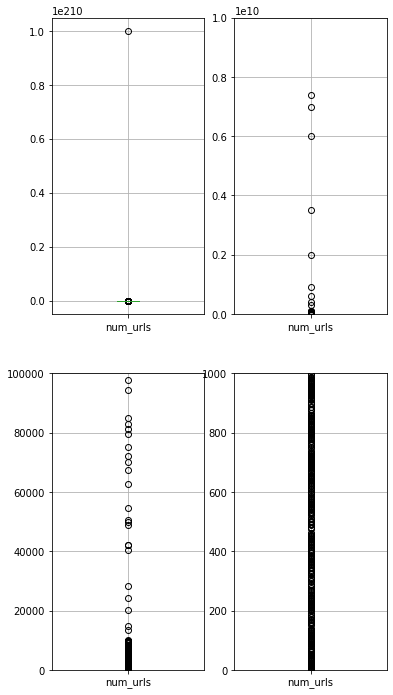

In [ ]:
fig = plt.figure()
fig.set_figheight(12)

plt.subplot(2, 2, 1)
box1 = tweets.boxplot(column=['num_urls'])

plt.subplot(2, 2, 2)
box2 = tweets.boxplot(column=['num_urls'])
plt.ylim(0, 1e10)

plt.subplot(2, 2, 3)
box3 = tweets.boxplot(column=['num_urls'])
plt.ylim(0, 1e5)

plt.subplot(2, 2, 4)
box4 = tweets.boxplot(column=['num_urls'])
plt.ylim(0, 1e3)                                  

plt.show()

In [ ]:
threshold=1e3

In [ ]:
outliers= tweets[tweets.num_urls>threshold].num_urls.count() # how many outliers> threshold?
percentage = round((outliers*100)/tweets.shape[0], 4)
print('Number of outliers> threshold:', outliers)
print('Percentage of outliers> threshold:', percentage,'%')

Number of outliers> threshold: 156
Percentage of outliers> threshold: 0.0014 %


* Outliers management > substitution with threshold

In [ ]:
tweets['num_urls']=tweets['num_urls'].apply(lambda x: threshold if x >threshold else x)

<ipython-input-153-8edecd3f14c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['num_urls']=tweets['num_urls'].apply(lambda x: threshold if x >threshold else x)


* Statistics without outliers (substituted with threshold) 

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.num_urls.describe() 

count   10624430.00
mean           0.20
std            5.24
min            0.00
25%            0.00
50%            0.00
75%            0.00
max         1000.00
Name: num_urls, dtype: float64

In [ ]:
print('Mean:', round(np.mean(tweets.num_urls),2))
print('St Dev:',round(np.std(tweets.num_urls),2))
median= np.nanmedian(tweets.num_urls)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(tweets.num_urls, nan_policy='omit'),2))
mode= stats.mode(tweets.num_urls, nan_policy='omit')[0][0]
print("Mode:", mode)

Mean: 0.2
St Dev: 5.24
Median: 0.0
MAD: 0.0
Mode: 0.0


* Sobstitution of NaN values with the most appropriate index

In [ ]:
tweets.num_urls.fillna(value=median, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of num_urls with NaN value:", tweets['num_urls'].isnull().sum())

Number of num_urls with NaN value: 0


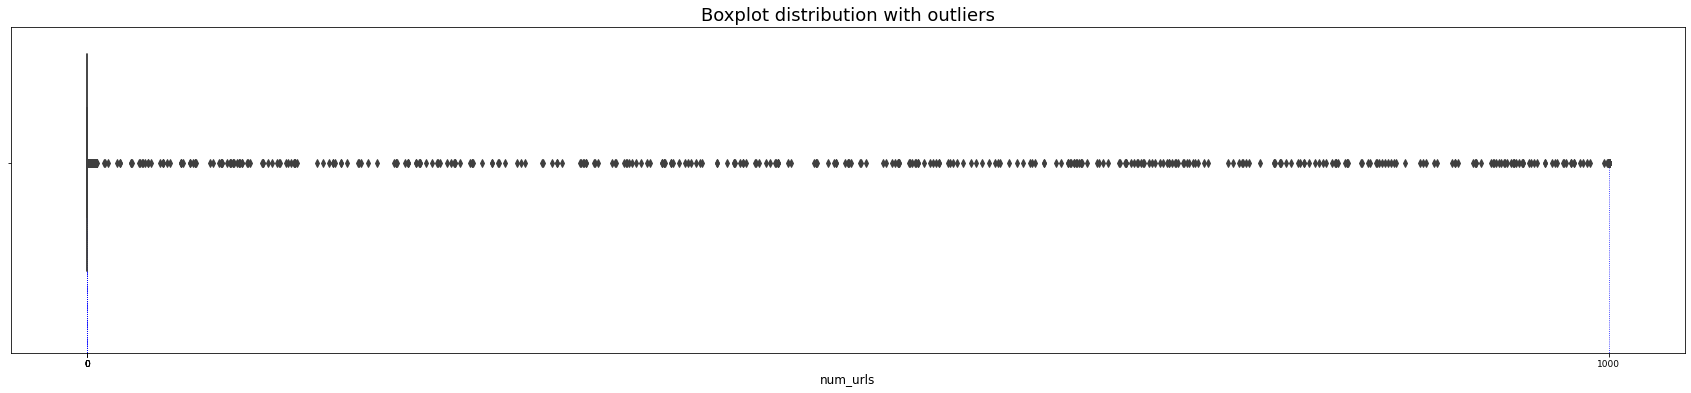

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='num_urls', data=tweets)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(tweets.num_urls, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("num_urls", rotation = "horizontal", size = 12)
plt.show()

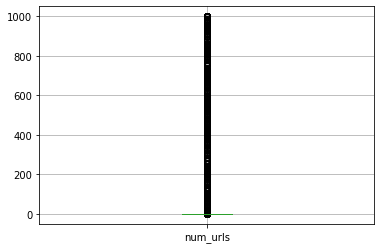

In [ ]:
tweets.boxplot(column=['num_urls']) 

### **'num_mentions'** attribute

In [ ]:
print("Number of num_mentions with NaN value:", tweets['num_mentions'].isnull().sum())

Number of num_mentions with NaN value: 670281


Transformation of non-numerical values in NaN and converts the numericals into *float64* datatype.

In [ ]:
tweets['num_mentions'] = pd.to_numeric(tweets.num_mentions, errors='coerce')

<ipython-input-161-9a4f9c176b1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['num_mentions'] = pd.to_numeric(tweets.num_mentions, errors='coerce')


In [ ]:
print("Number of num_mentions with NaN value:", tweets['num_mentions'].isnull().sum()) 

Number of num_mentions with NaN value: 785995


In [ ]:
tweets.num_mentions.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of num_mentions with NaN value:", tweets['num_mentions'].isnull().sum())
# No inf

Number of num_mentions with NaN value: 785995


Checking for negative and decimal values through the numericals.

In [ ]:
(tweets.num_mentions < 0).sum() # There are no negative numbers in num_mentions

0

In [ ]:
(tweets.num_mentions %1 != 0).sum() # There are no decimal numbers (= NaN)

785995

In [ ]:
np.min(tweets.num_mentions)

0.0

In [ ]:
np.max(tweets.num_mentions)

6e+87

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.num_mentions.describe() 

count                                          10492707.00
mean    57182575106690763866130655958492520924362678149...
std     18522835829105841023873700665508756326626117384...
min                                                   0.00
25%                                                   0.00
50%                                                   0.00
75%                                                   1.00
max     59999999999999997565003467381021763889519765378...
Name: num_mentions, dtype: float64

In [ ]:
print('num_mentions Mean:', round(np.mean(tweets.num_mentions),2), 'num_mentions')

num_mentions Mean: 5.718257510669076e+80 num_mentions


In [ ]:
print('num_mentions Standard Deviation:',round(np.std(tweets.num_mentions),2), 'num_mentions')

num_mentions Standard Deviation: 1.8522834946452951e+84 num_mentions


In [ ]:
median= np.nanmedian(tweets.num_mentions)
print('num_mentions Median:', round(median,2), 'num_mentions')

num_mentions Median: 0.0 num_mentions


In [ ]:
stats.median_abs_deviation(tweets.num_mentions, nan_policy='omit')

0.0

In [ ]:
stats.mode(tweets.num_mentions, nan_policy='omit') 

ModeResult(mode=array([0.]), count=array([6253476.]))

In [ ]:
mode= stats.mode(tweets.num_mentions, nan_policy='omit')[0][0]
print("num_mentions Mode:", mode)

num_mentions Mode: 0.0


* Boxplot and outliers' analysis

In [ ]:
# Check the number of outliers
Q1, Q3= tweets.num_mentions.quantile([0.25, 0.75]) # first and third quartiles
IQR = Q3-Q1 # interquartile range

min = round(Q1- 1.5* IQR) # Boxplot minimum value
max = round(1.5* IQR + Q3) # Boxplot maximum value

outliers = 0
for x in tweets.num_mentions:
  if x > max or x < min: 
    outliers = outliers+1

percentage = round((outliers*100)/tweets.shape[0],2)
print('Number of outliers:', outliers)
print('Percentage of outliers', percentage,'%')

Number of outliers: 240239
Percentage of outliers 2.13 %


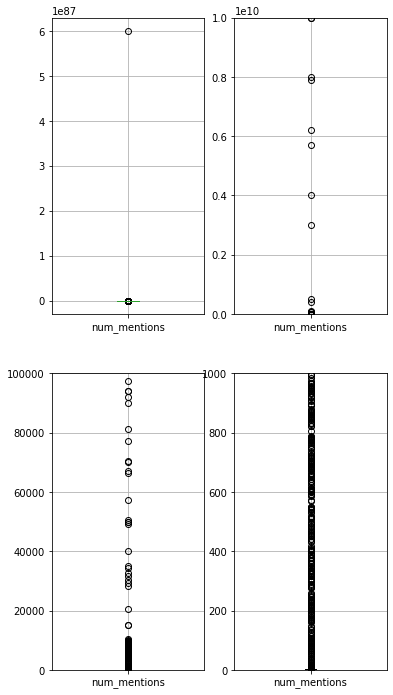

In [ ]:
fig = plt.figure()
fig.set_figheight(12)

plt.subplot(2, 2, 1)
box1 = tweets.boxplot(column=['num_mentions'])

plt.subplot(2, 2, 2)
box2 = tweets.boxplot(column=['num_mentions'])
plt.ylim(0, 1e10)

plt.subplot(2, 2, 3)
box3 = tweets.boxplot(column=['num_mentions'])
plt.ylim(0, 1e5)

plt.subplot(2, 2, 4)
box4 = tweets.boxplot(column=['num_mentions'])
plt.ylim(0, 1e3)                                        

plt.show()

In [ ]:
threshold=1e3

In [ ]:
outliers= tweets[tweets.num_mentions>threshold].num_mentions.count() # how many outliers> threshold?
percentage = round((outliers*100)/tweets.shape[0], 4) 
print('Number of outliers> threshold:', outliers)
print('Percentage of outliers> threshold:', percentage,'%')

Number of outliers> threshold: 152
Percentage of outliers> threshold: 0.0013 %


* Outliers management > substitution with threshold

In [ ]:
tweets['num_mentions']=tweets['num_mentions'].apply(lambda x: threshold if x >threshold else x)

<ipython-input-180-a88fc0b6b6c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['num_mentions']=tweets['num_mentions'].apply(lambda x: threshold if x >threshold else x)


* Statistics without outliers (substituted with threshold) 

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
tweets.num_mentions.describe() 

count   10492707.00
mean           0.55
std            4.97
min            0.00
25%            0.00
50%            0.00
75%            1.00
max         1000.00
Name: num_mentions, dtype: float64

In [ ]:
print('Mean:', round(np.mean(tweets.num_mentions),2))
print('St Dev:',round(np.std(tweets.num_mentions),2))
median= np.nanmedian(tweets.num_mentions)
print('Median:', round(median,2))
print('MAD:', round(stats.median_abs_deviation(tweets.num_mentions, nan_policy='omit'),2))
mode= stats.mode(tweets.num_mentions, nan_policy='omit')[0][0]
print("Mode:", mode)

Mean: 0.55
St Dev: 4.97
Median: 0.0
MAD: 0.0
Mode: 0.0


* Sobstitution of NaN values with the most appropriate index

In [ ]:
tweets.num_mentions.fillna(value=median, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print("Number of num_mentions with NaN value:", tweets['num_mentions'].isnull().sum())

Number of num_mentions with NaN value: 0


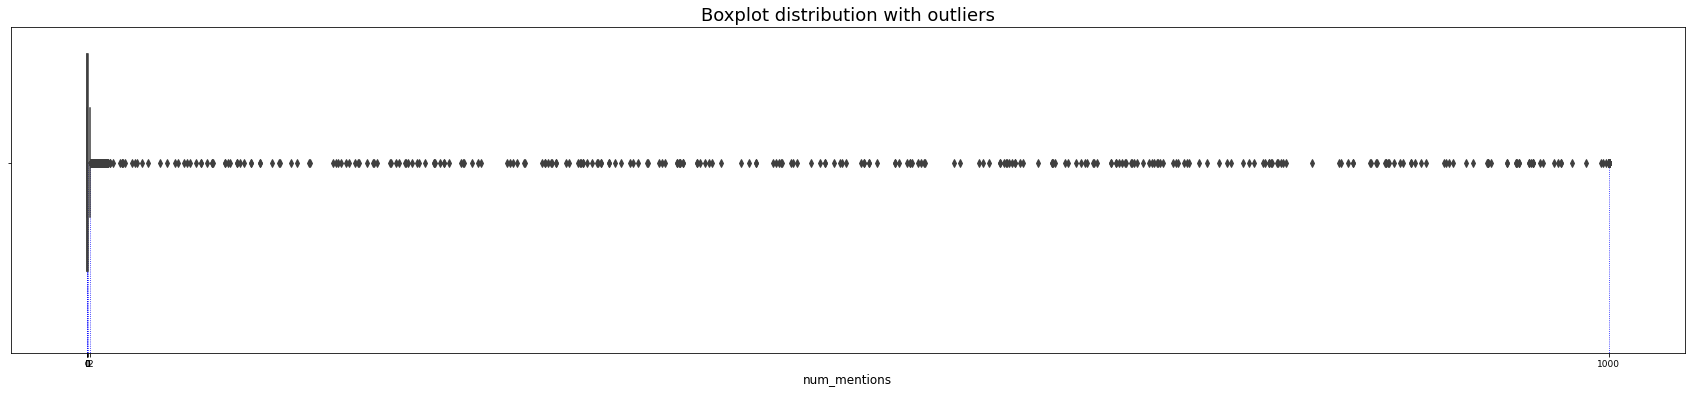

In [ ]:
# Boxplot distribution with outliers
plt.figure(figsize=(30,6))
age_boxplot = sns.boxplot(x='num_mentions', data=tweets)
plt.title("Boxplot distribution with outliers", size = 18)
quantiles = np.quantile(tweets.num_mentions, [0.00, 0.25, 0.50, 0.75, 1.00])
quantiles = np.append(quantiles, max)
age_boxplot.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.8, zorder=0)
age_boxplot.set_xticks(quantiles)
age_boxplot.tick_params(axis="x", labelsize=9)
age_boxplot.set_ylim(bottom=0.7, auto=True)
age_boxplot.set_xlabel("num_mentions", rotation = "horizontal", size = 12)
plt.show()

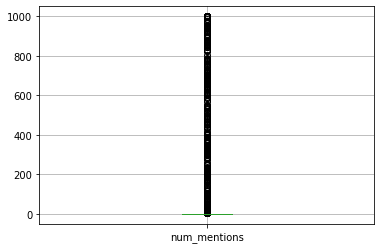

In [ ]:
tweets.boxplot(column=['num_mentions']) 

### **'created_at'** attribute

In [ ]:
# Change type for date
tweets['created_at'] = pd.to_datetime(tweets.created_at, format='%Y-%m-%d %H:%M:%S')

<ipython-input-187-3bc244ecbd65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['created_at'] = pd.to_datetime(tweets.created_at, format='%Y-%m-%d %H:%M:%S')


We check for dates preceding 2006-03-21, which corresponds to the date of foundation of Twitter, and for date after the data crawling (project release date)

In [ ]:
wrong_dates= ((tweets['created_at'] > '2022-09-28 00:00:00') | (tweets['created_at'] < '2006-03-21 00:00:00'))
print('Invalid dates:', wrong_dates.sum())

Invalid dates: 97605


In [ ]:
tweets.loc[wrong_dates, 'created_at'] = np.nan # Convert invalid dates to NaN

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
print("Number of created_at with NaN value:", tweets['created_at'].isnull().sum())

Number of created_at with NaN value: 97605


### **'text' attribute**

In [ ]:
print("Number of texts with NaN value:", tweets['text'].isnull().sum())

Number of texts with NaN value: 417300


Noticing that there are 611 null elements, which we keep as valid data considering that we don't have a specification about the semantics and syntax of the text attribute.

In [ ]:
tweets[tweets['text']==''].sum()

<ipython-input-192-7d270c51afb7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tweets[tweets['text']==''].sum()


id               0.00
user_id          0.00
retweet_count    0.00
reply_count      0.00
favorite_count   0.00
num_hashtags     0.00
num_urls         0.00
num_mentions     0.00
text             0.00
dtype: float64

## Saving cleaned dataset

In [ ]:
tweets.to_csv('/content/drive/Shareddrives/DataMining/dataset/clean_tweets.csv', index=False)

# Statistics



In [ ]:
tweets = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/clean_tweets.csv', lineterminator='\n') # read the new dataset for statistics

## Dependencies and Correlations

###Correlations

Predictably, the correlations in this phase show no interesting results.

In [ ]:
tweets.loc[ : , ~tweets.columns.isin(['id', 'created_at', 'text']) ].corr(method='pearson')

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
user_id,1.000000,0.000081,0.000006,0.000022,0.000056,0.000046,-0.000010
retweet_count,0.000081,1.000000,0.000776,0.021171,0.000054,-0.000856,0.008878
reply_count,0.000006,0.000776,1.000000,0.014399,-0.000096,-0.000067,-0.000132
favorite_count,0.000022,0.021171,0.014399,1.000000,0.001747,0.000675,0.001432
num_hashtags,0.000056,0.000054,-0.000096,0.001747,1.000000,0.000642,0.001881
num_urls,0.000046,-0.000856,-0.000067,0.000675,0.000642,1.000000,-0.000806
num_mentions,-0.000010,0.008878,-0.000132,0.001432,0.001881,-0.000806,1.000000


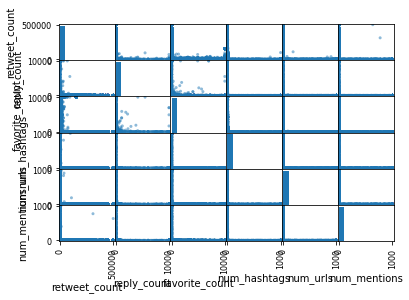

In [ ]:
pd.plotting.scatter_matrix(tweets[['retweet_count','reply_count','favorite_count','num_hashtags','num_urls','num_mentions']])
plt.show()

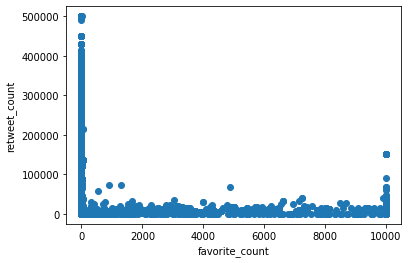

In [ ]:
#scatter plot
plt.scatter(tweets['favorite_count'], 
            tweets['retweet_count'])
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.show()

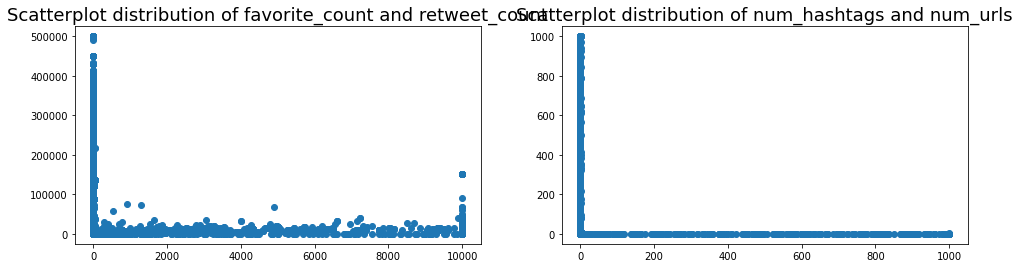

In [ ]:
plt.rcParams["figure.figsize"] = [16, 4]
plt.subplot(1, 2, 1)
#distribuzione e tendenze centrali: boxplot
scatter1 = plt.scatter(tweets['favorite_count'], tweets['retweet_count'])
plt.title("Scatterplot distribution of favorite_count and retweet_count", size = 18)
#scatter1.set_xlabel("favorite_count", rotation = "horizontal", size = 16)
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(tweets['num_hashtags'], tweets['num_urls'])
plt.title("Scatterplot distribution of num_hashtags and num_urls", size = 18)
#scatter2.set_xlabel("num_hashtags", rotation = "horizontal", size = 16)
plt.show()

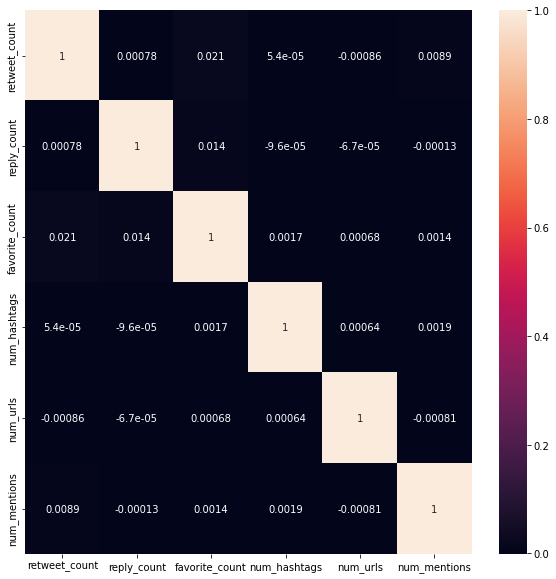

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))          
sns.heatmap(tweets[['retweet_count', 'reply_count','favorite_count','num_hashtags', 'num_urls', 'num_mentions']].corr(), annot=True) 
plt.show()

* Statistics on the 0 values percentage through the dataset to show the reasons of correlations close to 0. 

In [ ]:
(tweets['retweet_count']==0).value_counts(normalize=True) * 100 
#percentage of values = 0 in retweet_count

True     73.50735
False    26.49265
Name: retweet_count, dtype: float64

In [ ]:
(tweets['retweet_count'].value_counts()/tweets['retweet_count'].count())*100
#percentage of all the other values in retweet_count

0.0         73.507350
1.0          8.569922
2.0          2.613944
3.0          1.318077
4.0          0.817665
              ...    
163021.0     0.000009
19876.0      0.000009
132025.0     0.000009
39280.0      0.000009
376246.0     0.000009
Name: retweet_count, Length: 45449, dtype: float64

In [ ]:
(tweets['reply_count']==0).value_counts(normalize=True) * 100 
#percentage of values = 0 in reply_count

True     99.836807
False     0.163193
Name: reply_count, dtype: float64

In [ ]:
(tweets['reply_count'].value_counts()/tweets['reply_count'].count())*100
#percentage of all the other values in reply_count

0.0       99.836807
1.0        0.125236
2.0        0.011562
3.0        0.004043
4.0        0.002013
            ...    
753.0      0.000009
9767.0     0.000009
510.0      0.000009
3263.0     0.000009
587.0      0.000009
Name: reply_count, Length: 575, dtype: float64

In [ ]:
(tweets['favorite_count']==0).value_counts(normalize=True) * 100 
#percentage of values = 0 in favorite_count

True     81.307025
False    18.692975
Name: favorite_count, dtype: float64

In [ ]:
(tweets['favorite_count'].value_counts()/tweets['favorite_count'].count())*100
#percentage of all the other values in favorite_count

0.0       81.307025
1.0       11.232871
2.0        3.248033
3.0        1.464282
4.0        0.801635
            ...    
1928.0     0.000009
4200.0     0.000009
1366.0     0.000009
5112.0     0.000009
3063.0     0.000009
Name: favorite_count, Length: 1431, dtype: float64

In [ ]:
(tweets['num_hashtags']==0).value_counts(normalize=True) * 100 
#percentage of values = 0 in num_hashtags

True     89.576602
False    10.423398
Name: num_hashtags, dtype: float64

In [ ]:
(tweets['num_hashtags'].value_counts()/tweets['num_hashtags'].count())*100
#percentage of all the other values in num_hashtags

0.0      89.576602
1.0       7.088023
2.0       2.103833
3.0       0.686258
4.0       0.252706
           ...    
836.0     0.000009
384.0     0.000009
789.0     0.000009
812.0     0.000009
949.0     0.000009
Name: num_hashtags, Length: 236, dtype: float64

In [ ]:
(tweets['num_urls']==0).value_counts(normalize=True) * 100 
#percentage of values = 0 in num_urls

True     84.717621
False    15.282379
Name: num_urls, dtype: float64

In [ ]:
(tweets['num_urls'].value_counts()/tweets['num_urls'].count())*100
#percentage of all the other values in num_urls

0.0      84.717621
1.0      15.077542
2.0       0.189064
3.0       0.007545
4.0       0.002527
           ...    
814.0     0.000009
523.0     0.000009
657.0     0.000009
368.0     0.000009
260.0     0.000009
Name: num_urls, Length: 344, dtype: float64

In [ ]:
(tweets['num_mentions']==0).value_counts(normalize=True) * 100 
#percentage of values = 0 in num_mentions

True     62.41384
False    37.58616
Name: num_mentions, dtype: float64

In [ ]:
(tweets['num_mentions'].value_counts()/tweets['num_mentions'].count())*100
#percentage of all the other values in num_mentions

0.0      62.413840
1.0      30.181585
2.0       5.274552
3.0       1.283942
4.0       0.407600
           ...    
767.0     0.000009
24.0      0.000009
303.0     0.000009
30.0      0.000009
603.0     0.000009
Name: num_mentions, Length: 279, dtype: float64